In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\BASHA\Desktop\machine learning\insurance.csv")

**Data Exploration**

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

3

In [8]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

In [10]:
#statistical summary

dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Group the dataset by sex,smoker,region**

In [11]:
dataset.groupby('sex')

In [12]:
dataset.groupby('smoker')

In [13]:
dataset.groupby('region')

**Dealing with missing values**

In [14]:
dataset.isnull().values.any()

False

In [15]:
dataset.isnull().values.sum()

0

**Encoding the categorical data**

In [16]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# ONE HOT ENCODING

dataset = pd.get_dummies(data=dataset,drop_first=True).astype(int)

In [22]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [23]:
dataset.shape

(1338, 9)

**Correlation matrix**

In [24]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correlation with charges'}>

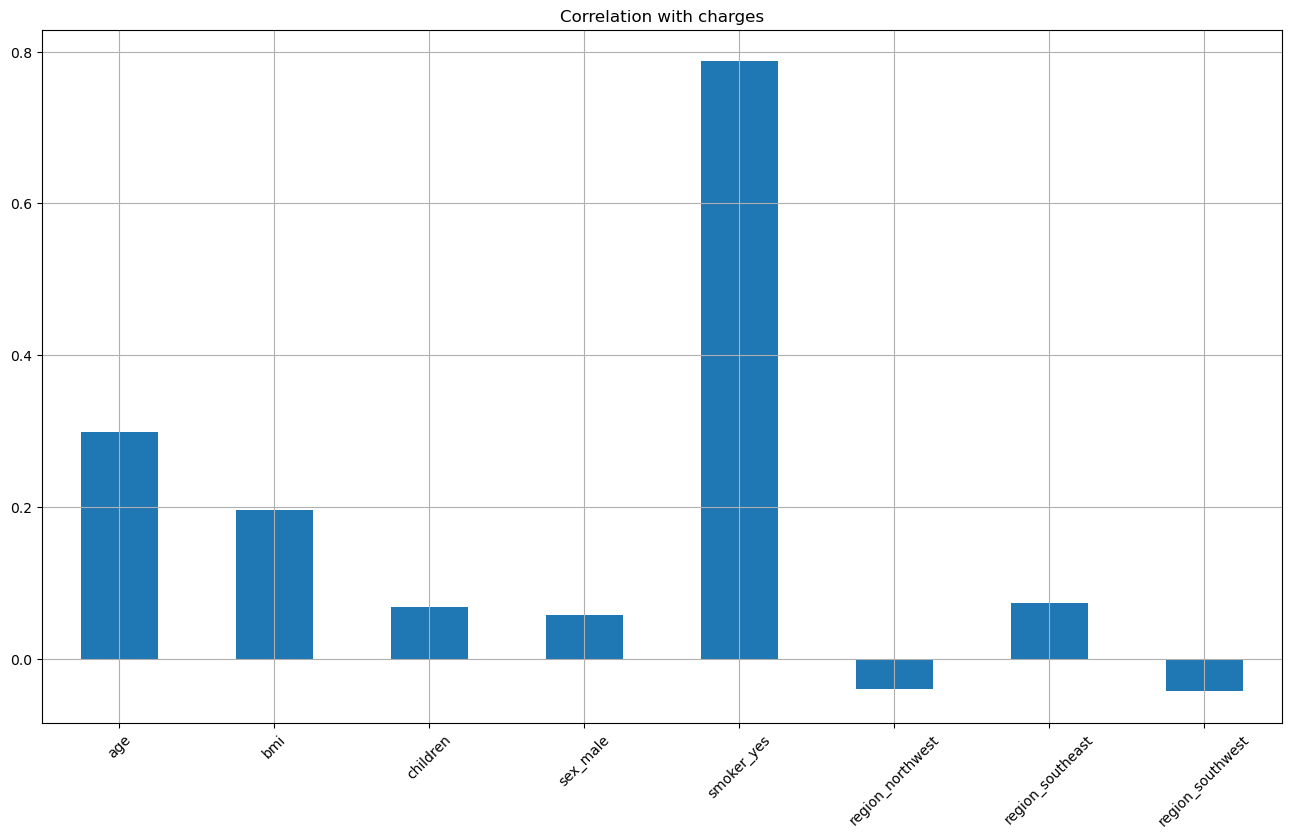

In [25]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9),title='Correlation with charges',rot=45,grid=True
)

In [26]:
corr = dataset.corr()

<Axes: >

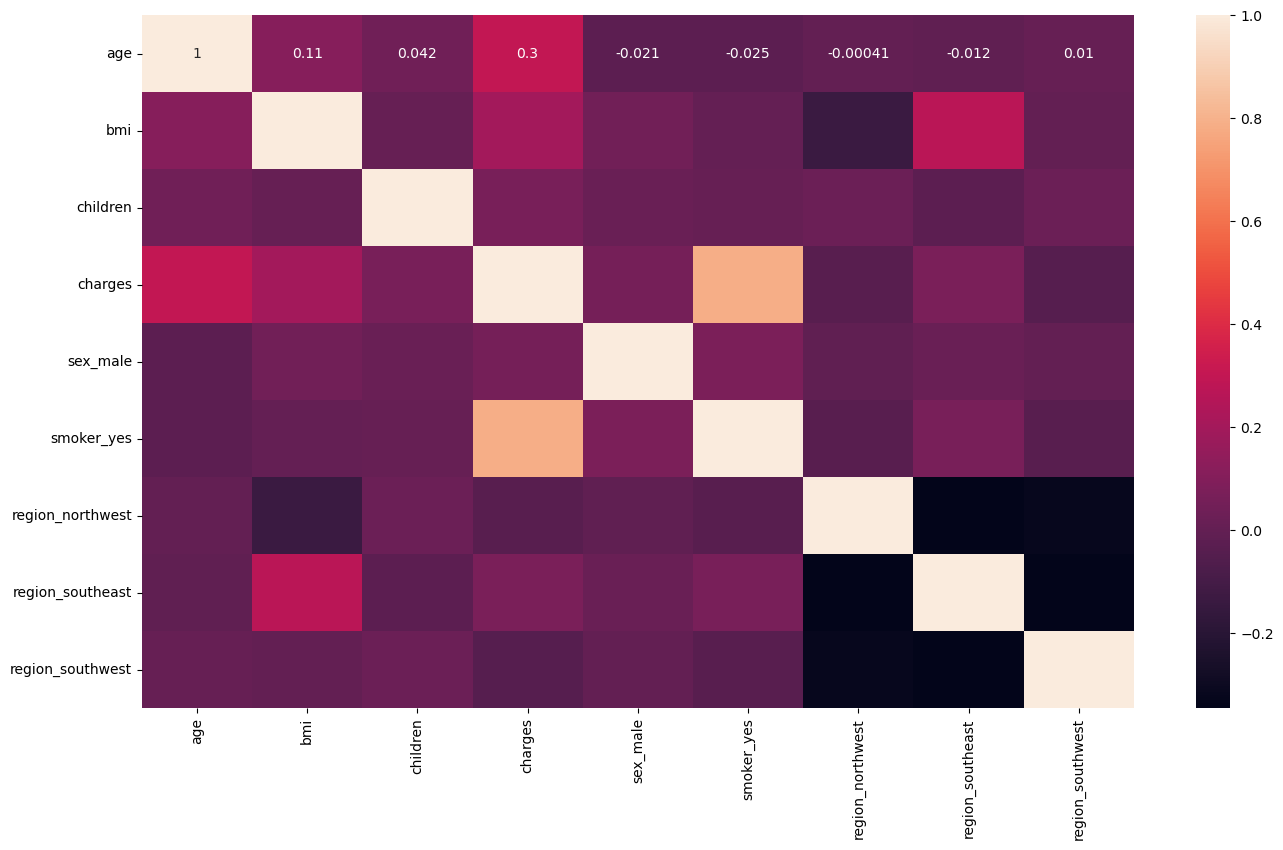

In [27]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

**Splitting the dataset**

In [28]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [29]:
# matrix of features / independent variables
X = dataset.drop(columns='charges')

In [30]:
# target / dependent variables
y = dataset['charges']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [32]:
X_train.shape

(1070, 8)

In [33]:
y_train.shape

(1070,)

In [34]:
X_test.shape

(268, 8)

In [35]:
y_test.shape

(268,)

**Feature scaling**

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[-0.14853305,  0.60616004,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.60616004, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.92836135,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.84374587, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.7672607 , -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97145047, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [38]:
X_test

array([[ 0.91668389, -0.03824259, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.19934324, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.57276398,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.57276398, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.41166332,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -1.00484653,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

**Model Building**

In [39]:
#linear regression

from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = regressor_lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test, y_pred)

0.7995787849960009

In [43]:
# random forest regression

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
y_pred = regressor_rf.predict(X_test)

In [45]:
r2_score(y_test, y_pred)

0.8830393273608693

In [46]:
# XGBoost regression

from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [47]:
y_pred = regressor_xgb.predict(X_test)

In [48]:
r2_score(y_test, y_pred)

0.898348869375626

**Example for prediction**

**Name:Basha, age:40, sex:1, bmi:45.50, children:4, smoker:1, region: northeast**

In [49]:
dataset.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0


In [50]:
basha_obs = [[40,45.5,4,1,1,0,0,0]]

In [51]:
regressor_xgb.predict(sc.transform(basha_obs))

C:\Users\BASHA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([44883.293], dtype=float32)